# GSE GenAI Research Repo Keyword Frequency Analysis

**Author:** Michael Spencer

**Purpose:** Analyzes scraped data from the `web_scraper.py` script and conducts a basic keyword frequency analysis.

## Instructions

Basic Text Analysis
- Perform a basic keyword frequency analysis on the scraped data.
- Provide a brief summary (2-3 sentences) of the key information extracted from the data.
- Present your findings in a concise report (max 1 page, tables/figures excluded) that includes a list of all papers’ metadata (title, author(s), date, etc.).

## Research Plan

- Read in CSV
- Perform frequency analysis on title and abstract, respectively they provide context on the high-level wording used in the field and the more meaningful methodologies, results and significance of the work.
  - Concatenate title and abstract for each article.
  - Tokenize and clean words (i.e. removing stopwords, convert to lowercase, remove punctuation, etc.).
  - I'm going to try looking at individual words first, but I also want to quickly look at bi-grams since there are many in the field (i.e. artifical intelligence, machine learning, etc.).
- Sort results based on keyword frequency
  - Visualize top words via a bar chart.
- Draw conclusions

## Setup

### Libraries

In [4]:
# Environment libraries
from pathlib import Path

#Analysis libraries
import pandas as pd
import nltk
import re # For text cleaning
from nltk.corpus import stopwords
from nltk.util import ngrams

# Visualization libraries
from plotnine import *

### Variables

In [5]:
project_root = str(Path.cwd().resolve().parent)
path_data = project_root + "/data/clean/gse_genai_articles.csv"

## Load the Data

In [6]:
data_articles = pd.read_csv(path_data)
data_articles.head(10)

,Title,Authors,Date,Publisher,Link,Abstract,What is the application?,Who is the user?,What age?,Why use AI?,Study design
0,A Comprehensive Review on Generative AI for Ed...,"Uday Mittal, Siva Sai, Vinay Chamola, Devika S...",09/2024,IEEE,https://ieeexplore.ieee.org/document/10695056,Artificial Intelligence (AI) has immense poten...,"Teaching – Instructional Materials, Teaching –...","Student, Educator, School Leader","Elementary (PK5), Middle School (6-8), High Sc...","Efficiency, Outcomes – Literacy, Outcomes – Nu...",Systematic Review
1,A Digital Recommendation System for Personaliz...,"Dhananjaya. G. M., R. H. Goudar, Anjanabhargav...",02/2024,IEEE,https://ieeexplore.ieee.org/document/10445145,This review delves into using e-learning techn...,"Teaching – Instructional Materials, Teaching –...","Student, Educator","Elementary (PK5), Middle School (6-8), High Sc...","Efficiency, Outcomes – Differentiation",Systematic Review
2,A Framework for Responsible AI Education: A Wo...,"Caitlin Bentley, Christine Aicardi, Sammia Pov...",08/2023,SSRN,https://papers.ssrn.com/sol3/papers.cfm?abstra...,"With the emergence of generative AI, and its d...","Teaching – Instructional Materials, Teaching –...","Student, Educator, School Leader","High School (9-12), Post-Secondary","Outcomes – Differentiation, Outcomes – Durable...","Descriptive – Implementation and Use, Systemat..."
3,A Human-Centered Learning and Teaching Framewo...,"Siu-Cheung Kong, Yin Yang",04/2024,IEEE,https://ieeexplore.ieee.org/document/10507034,The advent of generative artificial intelligen...,"Teaching – Instructional Materials, Teaching –...",Educator,"Elementary (PK5), Middle School (6-8), High Sc...","Outcomes – Differentiation, Outcomes – Social ...","Descriptive – Implementation and Use, Impact –..."
4,A Perspective on K-12 AI Education,"Nathan Wang, Paul Tonko, Nikil Ragav, Michael ...",01/2023,arXiv,https://arxiv.org/abs/2206.03217,"Artificial intelligence (AI), which enables ma...","Teaching – Instructional Materials, Teaching –...","Educator, School Leader",High School (9-12),"Outcomes – Other Academic, Outcomes – Differen...",Descriptive – Product Development
5,A Review of Artificial Intelligence (AI) in Ed...,"Pongsakorn Limna, Somporch Jakwatanatham, Suti...",07/2022,SSRN,https://papers.ssrn.com/sol3/papers.cfm?abstra...,Objective: Artificial intelligence (AI) plays ...,"Teaching – Instructional Materials, Teaching –...","Student, Educator, School Leader","Elementary (PK5), Middle School (6-8), High Sc...","Efficiency, Outcomes – Other Academic, Outcome...",Systematic Review
6,A Systematic Assessment of OpenAI o1-Preview f...,"Ehsan Latif, Yifan Zhou, Shuchen Guo, Yizhu Ga...",10/2024,arXiv,https://arxiv.org/abs/2410.21287,As artificial intelligence (AI) continues to a...,"Teaching – Instructional Materials, Teaching –...",Educator,"Elementary (PK5), Middle School (6-8), High Sc...","Outcomes – Other Academic, Outcomes – Durable ...",Systematic Review
7,AI Agents and Education: Simulated Practice at...,"Ethan Mollick, Lilach Mollick, Natalie Bach, L...",06/2024,arXiv,https://arxiv.org/abs/2407.12796,This paper explores the potential of generativ...,"Teaching – Instructional Materials, Teaching –...","Student, Educator","High School (9-12), Post-Secondary, Adult","Efficiency, Outcomes – Differentiation, Reimag...",Descriptive – Product Development
8,AI and personalized learning: Bridging the gap...,"Kristjan-Julius Laak, Jaan Aru",04/2024,arXiv,https://arxiv.org/abs/2404.02798,Personalized learning (PL) aspires to provide ...,"Teaching – Instructional Materials, Teaching –...",Educator,"Elementary (PK5), Middle School (6-8), High Sc...","Efficiency, Outcomes – Other Academic, Outcome...",Systematic Review
9,AI literacy in K-12: a systematic literature r...,"Casal-Otero, Catala, Fernandez-Morante, Taboad...",04/2023,SpringerOpen,https://stemeducationjournal.springeropen.com/...,The successful irruption of AI-based technolog...,"Teaching – Instructional Material

The data should already be cleaned per our scraping script, so I won't conduct any additional cleaning on the table as a whole. Below I will begin analyzing the data and preparing the individual words for analysis.

## Data Analysis

### Text Parsing

I'm am going to use both the article titles and the abstracts for the keyword frequency analysis. Each of those two datapoints contain valuable information that inform us, respectively, about:
1. Common words used to describe work at a high level
2. Common words used in describing methodologies, significance and results

In [7]:
article_text = data_articles["Title"] + " " + data_articles["Abstract"]
article_corpus = article_text.str.cat(sep = ' ')

### Text Cleaning

In [8]:
# Lowercase text and remove punctuation and digits
article_corpus = re.sub(r'[^a-zA-Z\s]', '', article_corpus.lower())

# Tokenize the corpus and remove stopwords
stopwords = stopwords.words('english')
tokenized_corpus = nltk.word_tokenize(article_corpus, language = 'english', preserve_line = True)
cleaned_corpus = [token for token in tokenized_corpus if token not in stopwords]

### Keyword Counts

In [9]:
# Count individual word frequencies
word_freq = nltk.FreqDist(cleaned_corpus)

# Convert to DataFrame and take the top 30 words
data_word_freq = (pd.DataFrame(word_freq.items(), columns = ["word", "count"])
                    .sort_values(by='count', ascending=False))

data_word_freq.head(30)

,word,count
3,ai,282
10,learning,211
4,education,174
167,students,114
615,chatgpt,81
6,intelligence,76
15,educational,75
5,artificial,74
2,generative,72
249,teachers,65


In [10]:
bigrams_list = list(ngrams(cleaned_corpus, 2))

# Concatenate the words in the bigrams list to create a list of strings
bigrams_list = [' '.join(bigram) for bigram in bigrams_list]

# Count individual bigram frequencies
bigram_freq = nltk.FreqDist(bigrams_list)

# Convert to DataFrame and take the top 30 words
data_bigram_freq = (pd.DataFrame(bigram_freq.items(), columns = ["bigram", "count"])
                    .sort_values(by='count', ascending=False))

data_bigram_freq.head(30)

,bigram,count
5,artificial intelligence,70
2,generative ai,62
3,ai education,33
6,intelligence ai,25
405,ai literacy,17
1048,language models,15
337,ai tools,15
237,learning experience,14
173,machine learning,14
608,intelligence education,12


### Visualizations

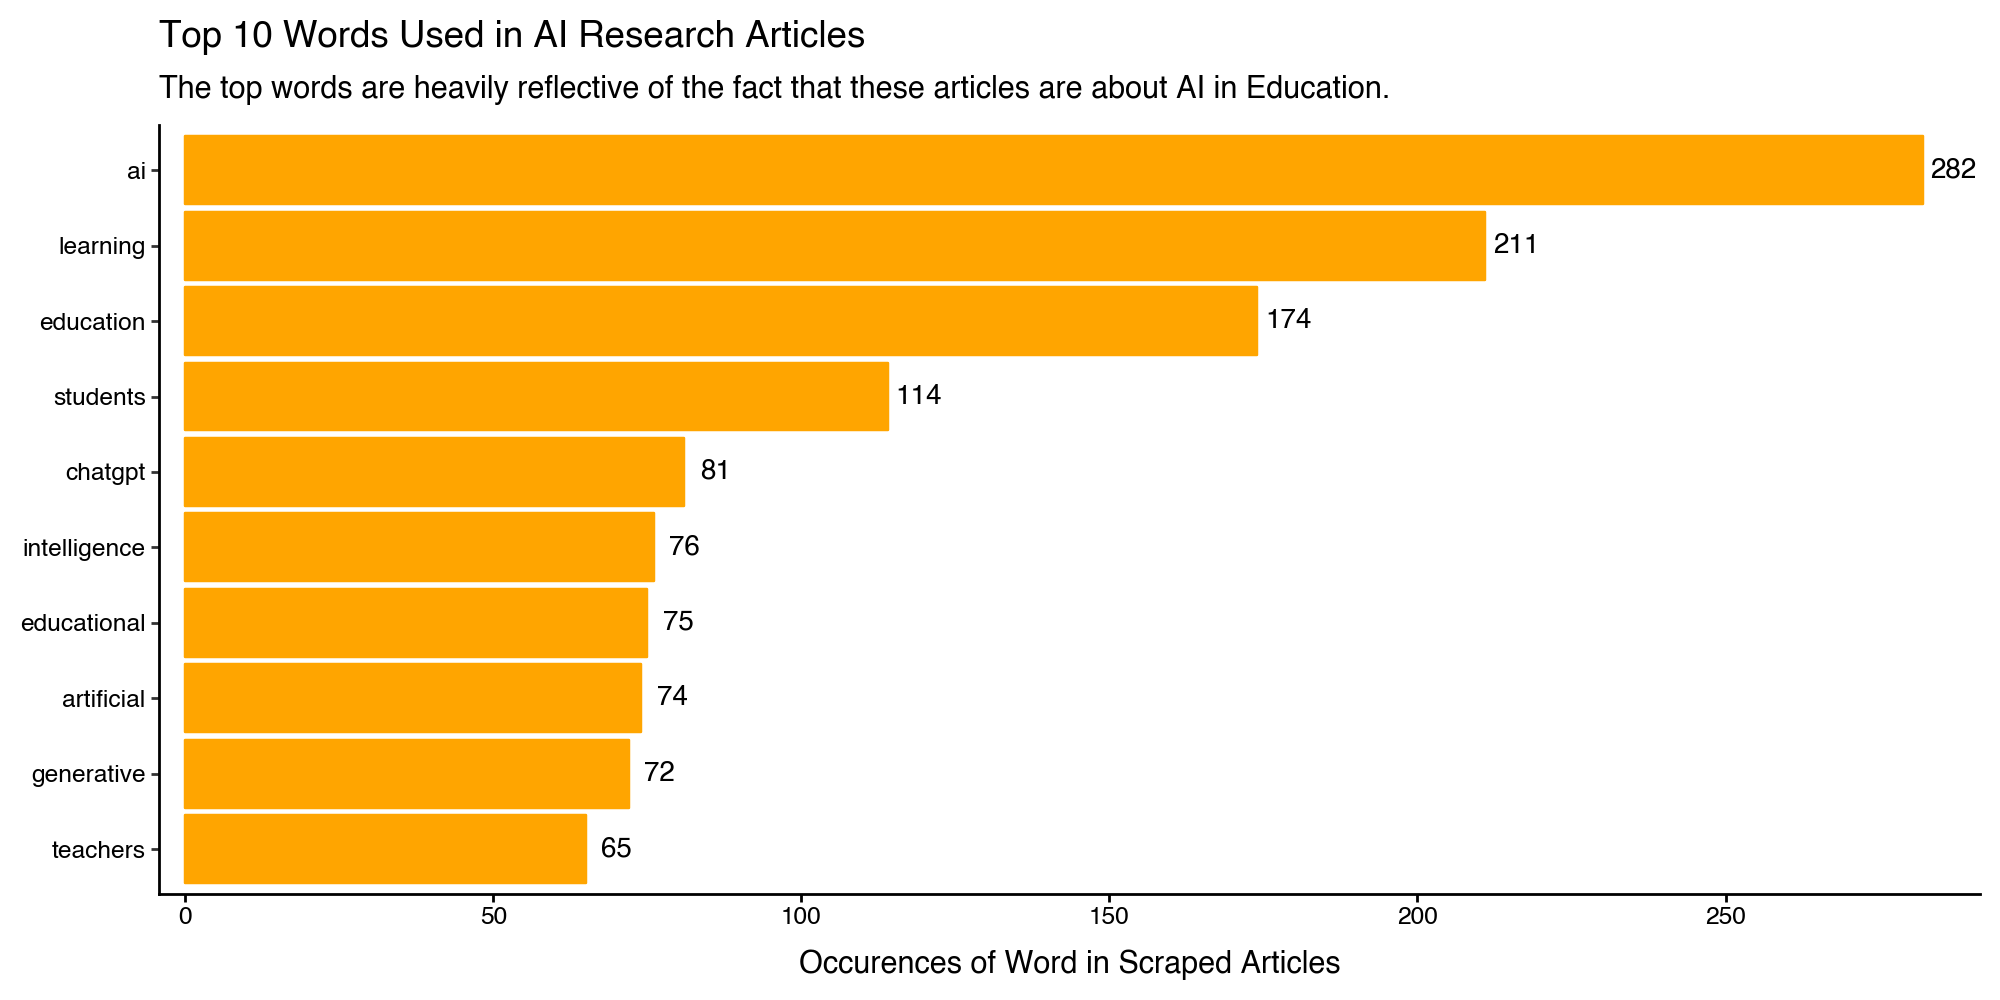

In [11]:
(ggplot(data_word_freq.head(10), aes(x = 'reorder(word, count)', y = 'count')) +
 geom_col(fill = 'orange', color = 'orange') +
 geom_text(
  aes(label = 'count'),
  nudge_y = 5,
  size = 10
 ) +
 labs(
  title = "Top 10 Words Used in AI Research Articles",
  subtitle = "The top words are heavily reflective of the fact that these articles are about AI in Education.",
  x = "",
  y = "Occurences of Word in Scraped Articles"
 ) +
 coord_flip() +
 scale_y_continuous(expand = (.015, 0), breaks = range(0, 300, 50)) +
 theme(
  panel_background = element_blank(),
  panel_grid_major = element_blank(),
  axis_ticks_major_x = element_text(color = "black"),
  axis_line = element_line(color = "black", size = 1),
  text = element_text(color = "black"),
  figure_size = [10, 5]
 ))


The top words that appear in the scraped research articles are "AI", "learning" and "education," reflective of the fact that these articles are about generative AI in education.

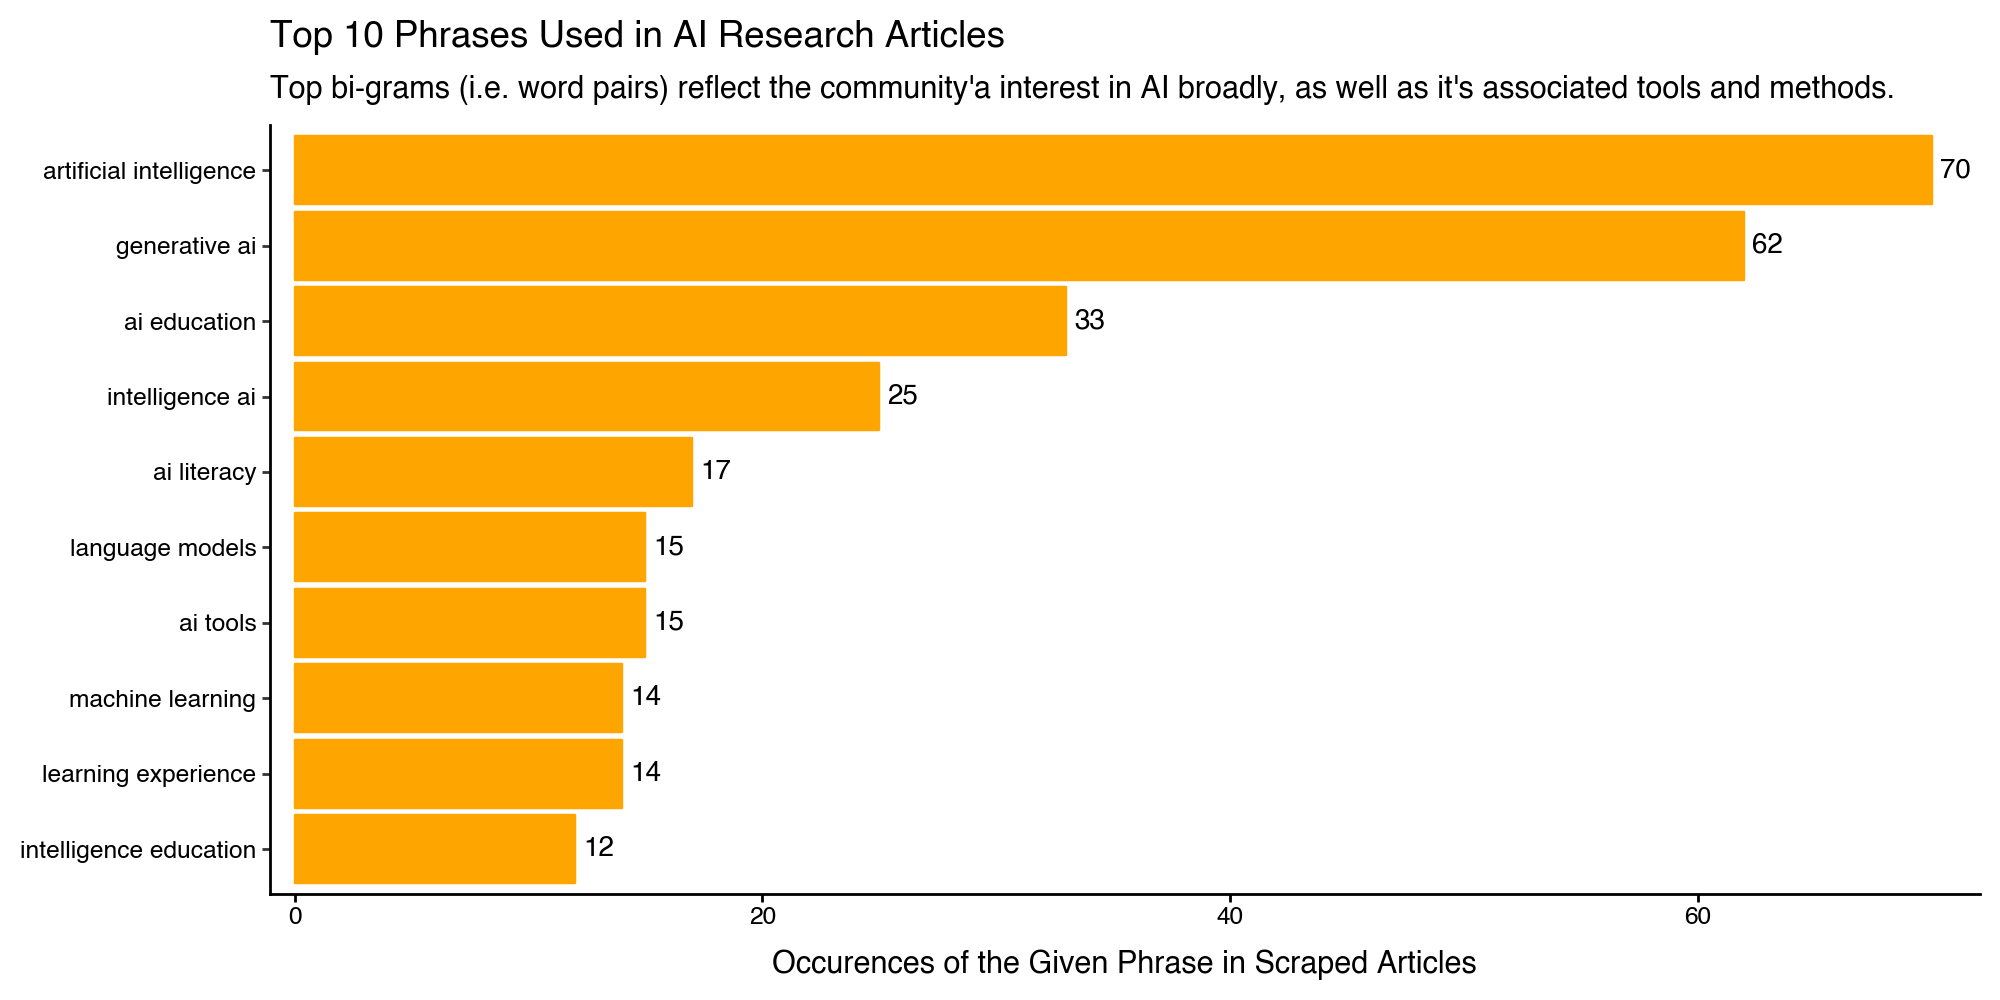

In [13]:
(ggplot(data_bigram_freq.head(10), aes(x = 'reorder(bigram, count)', y = 'count')) +
 geom_col(fill = 'orange', color = 'orange') +
 geom_text(
  aes(label = 'count'),
  nudge_y = 1,
  size = 10
 ) +
 labs(
  title = "Top 10 Phrases Used in AI Research Articles",
  subtitle = "Top bi-grams (i.e. word pairs) reflect the community'a interest in AI broadly, as well as it's associated tools and methods.",
  x = "",
  y = "Occurences of the Given Phrase in Scraped Articles"
 ) +
 coord_flip() +
 scale_y_continuous(expand = (.001, 1)) +
 theme(
  panel_background = element_blank(),
  panel_grid_major = element_blank(),
  axis_ticks_major_x = element_text(color = "black"),
  axis_line = element_line(color = "black", size = 1),
  text = element_text(color = "black"),
  figure_size = [10, 5]
 ))